In [66]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Random Numbers and Distributions

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import random
import math
import statsmodels.api as sm
grunfeld = sm.datasets.grunfeld

## Generate Random Numbers

In [68]:
nrand_data = stats.norm.rvs(size = 10000, loc = 1, scale = 3)

In [69]:
type(nrand_data)

numpy.ndarray

<AxesSubplot:ylabel='Density'>

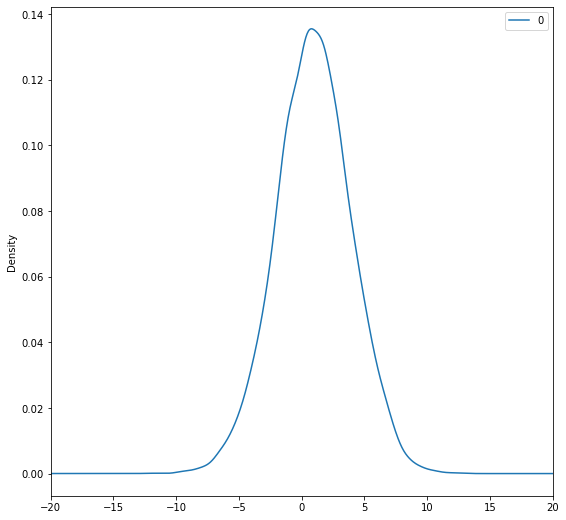

In [70]:
pd.DataFrame(nrand_data).plot(kind = "density", figsize = (9,9), xlim=(-20,20))

### Cumulative Distribution Function

In [71]:
stats.norm.cdf(x = 5, loc = 1, scale = 3)

0.9087887802741321

### Quantile value for a given probability

In [72]:
stats.norm.ppf(q=0.5, loc=1, scale=3)

1.0

### Probability Distriubution Function

In [73]:
for x in range(-1,12,3):
    denval = stats.norm.pdf(x, loc=1, scale=3)
    print("Density at x = " + str(x) + " is: " + str(denval))

Density at x = -1 is: 0.10648266850745075
Density at x = 2 is: 0.12579440923099774
Density at x = 5 is: 0.05467002489199788
Density at x = 8 is: 0.00874062969790316
Density at x = 11 is: 0.0005140929987637018


In [74]:
for x in range(-2,12,3):
    denval = stats.norm.pdf(x, loc=1, scale=3)
    print("Density at x = " + str(x) + " is: " + str(denval))

Density at x = -2 is: 0.08065690817304778
Density at x = 1 is: 0.1329807601338109
Density at x = 4 is: 0.08065690817304778
Density at x = 7 is: 0.017996988837729353
Density at x = 10 is: 0.001477282803979336


## Point Estimates and Confidence Intervals

In [75]:
import pandas as pd
grf = pd.read_csv("data/grunfeld_cleaned.csv")
grf.shape

(220, 5)

In [76]:
grf.isnull().sum()
grf[grf.duplicated()]
grf.head()

invest     0
value      0
capital    0
firm       0
year       0
dtype: int64

,invest,value,capital,firm,year


,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935
1,391.8,4661.7,52.6,General Motors,1936
2,410.6,5387.1,156.9,General Motors,1937
3,257.7,2792.2,209.2,General Motors,1938
4,330.8,4313.2,203.4,General Motors,1939


In [77]:
grf = grf.drop_duplicates()
grf = grf.dropna()

In [78]:
grf.shape

(220, 5)

### Point Estimate

In [79]:
grf["value"].sum()
grf["value"].mean()
grf["value"].median()

217487.11700000003

988.577804545455

404.65

### Confidence Interval

In [80]:
sample_size = 50
sample = np.random.choice(a = grf["value"], size = 50)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.9)
print("z critical value: " + str(z_critical))

pop_stdev = grf["value"].std()

margin_of_error = z_critical * pop_stdev/math.sqrt(sample_size)

confidence_interval = (sample_mean - margin_of_error , sample_mean + margin_of_error)
print("Confidence Interval: " + str(confidence_interval))

z critical value: 1.2815515655446004
Confidence Interval: (737.7699512347652, 1204.3876887652345)


## Probability Plot


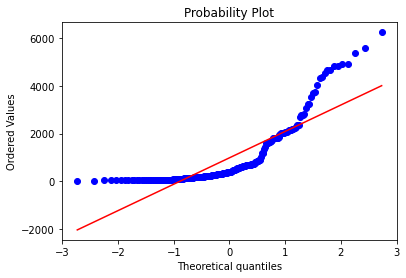

In [81]:
temp = stats.probplot(grf["value"], dist = "norm", plot = plt)
plt.show()

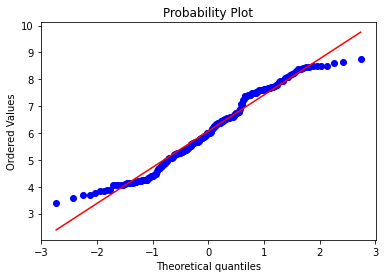

In [82]:
log_tip = np.log(grf["value"])
temp1 = stats.probplot(log_tip, dist = "norm", plot = plt)
plt.show()

## Hypothesis Tests

### One-Sample T Test

In [83]:
stats.ttest_1samp(a = grf["value"], popmean = 988)

Ttest_1sampResult(statistic=0.006657514635186957, pvalue=0.9946941715969403)

### Two Sample T Test

In [84]:
gm = grf[grf["firm"] == "General Motors"]
chr = grf[grf["firm"] == "Chrysler"]

gm.head()
chr.head()

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935
1,391.8,4661.7,52.6,General Motors,1936
2,410.6,5387.1,156.9,General Motors,1937
3,257.7,2792.2,209.2,General Motors,1938
4,330.8,4313.2,203.4,General Motors,1939


,invest,value,capital,firm,year
60,40.29,417.5,10.5,Chrysler,1935
61,72.76,837.8,10.2,Chrysler,1936
62,66.26,883.9,34.7,Chrysler,1937
63,51.60,437.9,51.8,Chrysler,1938
64,52.41,679.7,64.3,Chrysler,1939


In [85]:
stats.ttest_ind(a = gm["value"], b = chr["value"], equal_var = False)

Ttest_indResult(statistic=17.72696320127432, pvalue=8.82369247506473e-14)

### Determining Sample size for t-test

In [86]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.05, alpha = 0.05, power = 0.8)

3141.4655206624134

## Chi-Square Goodness of Fit test

In [87]:
sample_grf = tips.sample(n = 100, random_state = 1)
sample_grf.shape
sample_grf.head()

(100, 5)

,invest,value,capital,firm,year
91,59.37,232.90,534.6,Atlantic Refining,1946
34,405.10,1667.00,351.1,US Steel,1949
105,28.54,298.00,52.5,IBM,1940
180,2.54,70.91,4.5,Diamond Match,1935
88,62.24,151.20,426.6,Atlantic Refining,1943


In [88]:
orig = pd.crosstab(index = grf["year"], columns = "count")
sam = pd.crosstab(index = sample_grf["year"], columns = "count")

observed = sam
orig_ratio = orig/len(grf["year"])
expected = orig_ratio * len(sample_grf["year"])

In [89]:
stats.chisquare(f_obs = observed, f_exp = expected)

Power_divergenceResult(statistic=array([12.8]), pvalue=array([0.84865026]))

## Chi-Square Test of Independence

In [90]:
pd.crosstab(grf.year, grf.capital, margins = True)

capital,0.8,1.8,2.8,3.23,3.31,3.41,3.58,3.83,3.9,4.12,...,804.9,888.9,922.4,1020.1,1099.0,1207.7,1430.5,1777.3,2226.3,All
year,,,,,,,,,,,,,,,,,,,,,
1935,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1936,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1941,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
1942,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
1943,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [91]:
obs = pd.crosstab(grf.year, grf.capital, margins = True)

In [92]:
stats.chi2_contingency(observed = obs)

(4160.0,
 0.9914360970365532,
 4380,
 array([[5.0e-02, 5.0e-02, 5.0e-02, ..., 5.0e-02, 5.0e-02, 1.1e+01],
        [5.0e-02, 5.0e-02, 5.0e-02, ..., 5.0e-02, 5.0e-02, 1.1e+01],
        [5.0e-02, 5.0e-02, 5.0e-02, ..., 5.0e-02, 5.0e-02, 1.1e+01],
        ...,
        [5.0e-02, 5.0e-02, 5.0e-02, ..., 5.0e-02, 5.0e-02, 1.1e+01],
        [5.0e-02, 5.0e-02, 5.0e-02, ..., 5.0e-02, 5.0e-02, 1.1e+01],
        [1.0e+00, 1.0e+00, 1.0e+00, ..., 1.0e+00, 1.0e+00, 2.2e+02]]))

## Comparing multiple groups ANOVA

In [93]:
grf["year"].unique()

array([1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954], dtype=int64)

<AxesSubplot:title={'center':'capital'}, xlabel='[year]'>

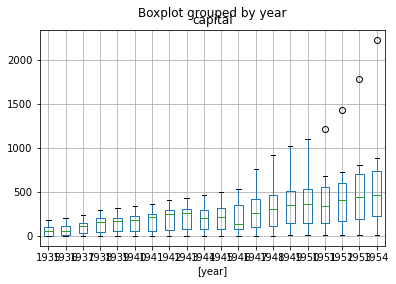

In [94]:
grf[["year", "capital"]].boxplot(by = "year")

In [106]:
zero = grf[grf["year"] == "1940"].value.values
one = grf[grf["year"] == "1941"].value.values
two = grf[grf["year"] == "1942"].value.values
three = grf[grf["year"] == "1943"].value.values

In [107]:
stats.f_oneway(zero, one, two, three)

F_onewayResult(statistic=nan, pvalue=nan)

C:\Users\awrap\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


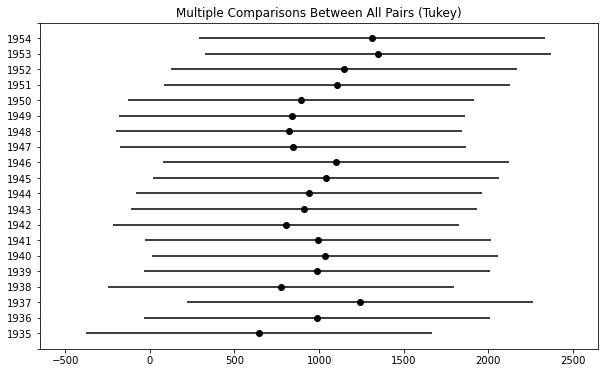

group1,group2,meandiff,p-adj,lower,upper,reject
1935,1936,339.5141,0.9,-1703.8705,2382.8987,False
1935,1937,593.1751,0.9,-1450.2095,2636.5597,False
1935,1938,130.4302,0.9,-1912.9544,2173.8148,False
1935,1939,343.7918,0.9,-1699.5928,2387.1764,False
1935,1940,391.303,0.9,-1652.0816,2434.6876,False
1935,1941,348.6031,0.9,-1694.7815,2391.9877,False
1935,1942,159.3453,0.9,-1884.0393,2202.7299,False
1935,1943,265.6205,0.9,-1777.7641,2309.0052,False
1935,1944,294.0705,0.9,-1749.3141,2337.4552,False
1935,1945,395.928,0.9,-1647.4566,2439.3126,False


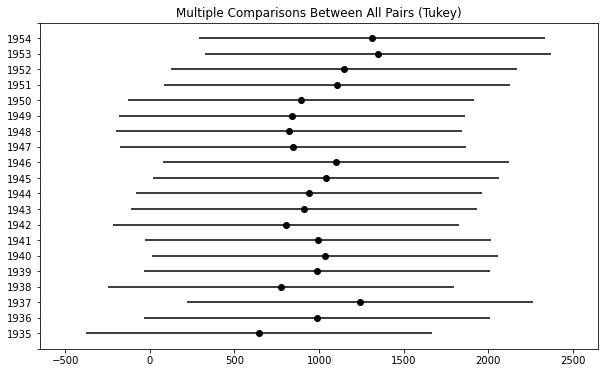

In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = grf["value"], groups = grf["year"], alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()

Reference

https://www.kaggle.com/hamelg/python-for-data-analysis-index